In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important;} .rendered_html table { margin-left: 10px; }</style>"))

# Concrete Strength Prediction
**Objective**

To predict the concrete strength using the data available in file "concrete.csv". Apply feature engineering and model tuning to obtain a score above 85%.

**Resourcess Available**

The data for this project is available in file [here](https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/)

**Attribute Information**

|Name | Data Type | Measurment | Description|
|:----|:----------|:-----------|:-----------|
| Cement (cement) |  Quantitative  |  kg in a m3 mixture  |  Input Variable |
| Blast Furnace Slag (slag) | Quantitative | kg in a m3 mixture | Input Variable |
| Fly Ash (ash) | Quantitative | kg in a m3 mixture | Input Variable |
| Water (water) | Quantitative | kg in a m3 mixture | Input Variable |
| Superplasticizer (superplastic) | Quantitative | kg in a m3 mixture | Input Variable |
| Coarse Aggregate (coarseagg) | Quantitative | kg in a m3 mixture | Input Variable |
| Fine Aggregate (fineagg) | Quantitative | kg in a m3 mixture | Input Variable |
| Age (age) | Quantitative | Day (1~365) | Input Variable |
|Concrete compressive Strength (strength) | Quantitative | MPa | Output Variable |

In [2]:
# import warnings
# warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Remove scientific notations and display numbers with 2 decimal points instead
plt.style.use('ggplot')

In [4]:
# importing data
concrete_df = pd.read_csv('concrete.csv')

## Overview of Data

In [5]:
concrete_df.shape

(1030, 9)

In [6]:
concrete_df.sample(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
443,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,56,31.72
1007,288.0,192.0,0.0,192.0,0.0,932.0,717.8,3,16.11
598,165.0,128.5,132.1,175.1,8.1,1005.8,746.6,56,53.72
243,322.5,148.6,0.0,185.8,8.5,951.0,709.5,28,52.43
249,108.3,162.4,0.0,203.5,0.0,938.2,849.0,90,29.23
187,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,7,13.71
943,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
173,276.0,116.0,90.0,180.0,9.0,870.0,768.0,28,44.28
914,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,14,17.82
592,238.1,0.0,0.0,185.7,0.0,1118.8,789.3,7,10.34


## Univariate Analysis

In [7]:
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [8]:
concrete_df.nunique()

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

In [9]:
#Check for duplicated rows
concrete_df.duplicated(keep='first').sum()

25

In [10]:
# remove 25 duplicated rows
concrete_df.drop_duplicates(inplace=True)

In [11]:
# show that 25 rows were removed
concrete_df.shape

(1005, 9)

In [12]:
concrete_df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [13]:
concrete_df.skew()

cement          0.564959
slag            0.855225
ash             0.497231
water           0.034433
superplastic    0.980604
coarseagg      -0.065256
fineagg        -0.252353
age             3.253974
strength        0.395696
dtype: float64

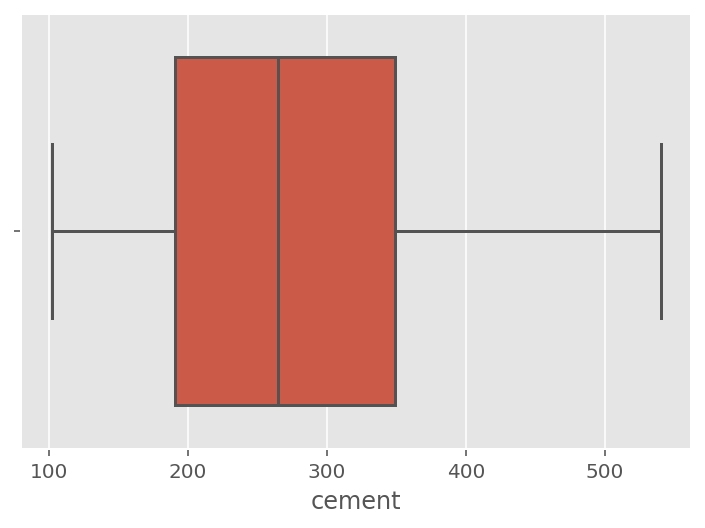

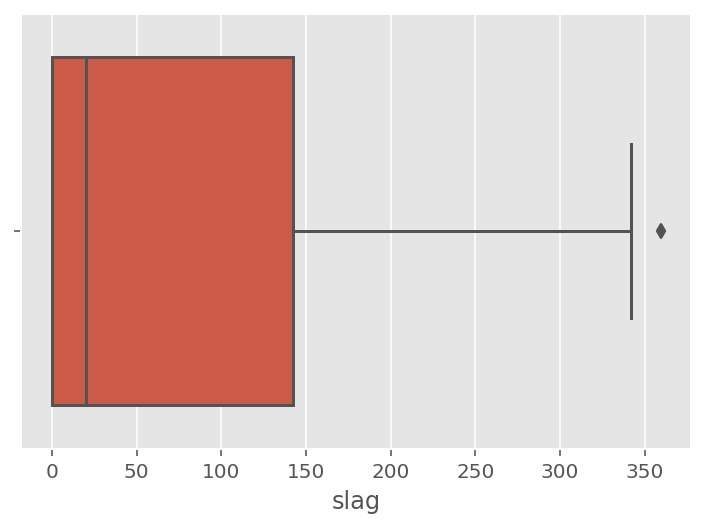

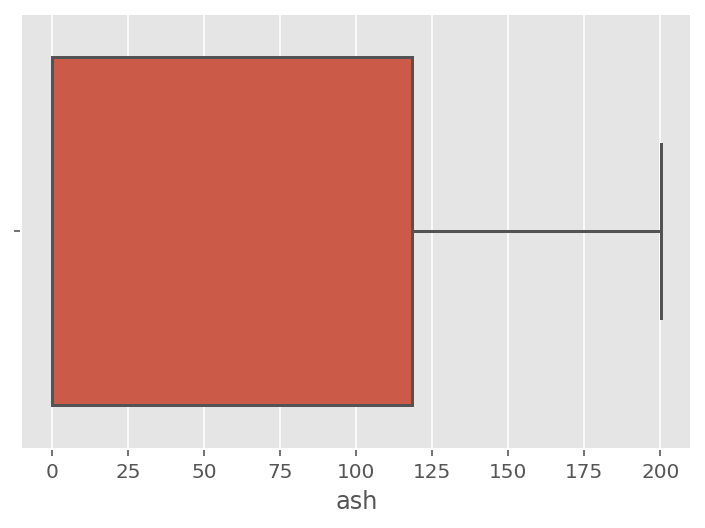

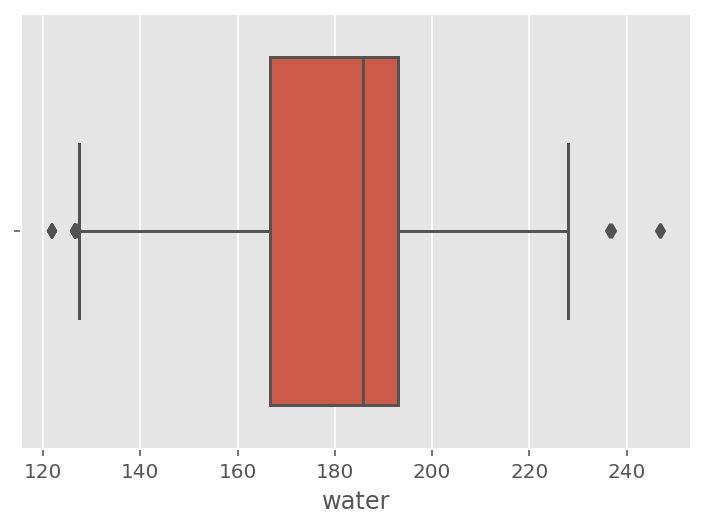

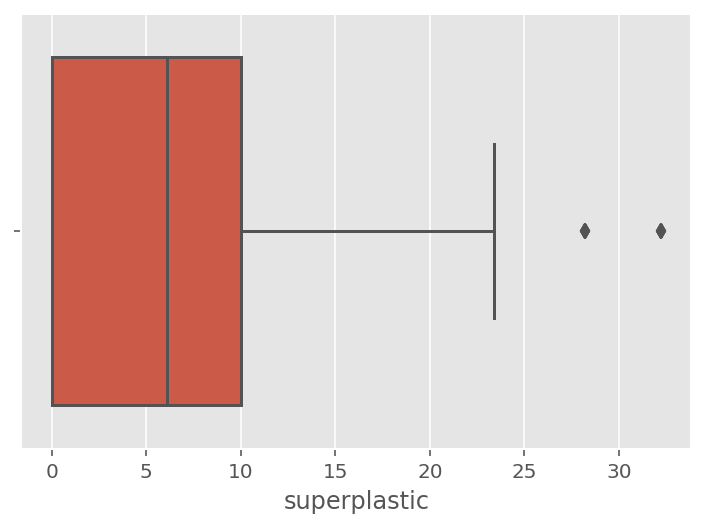

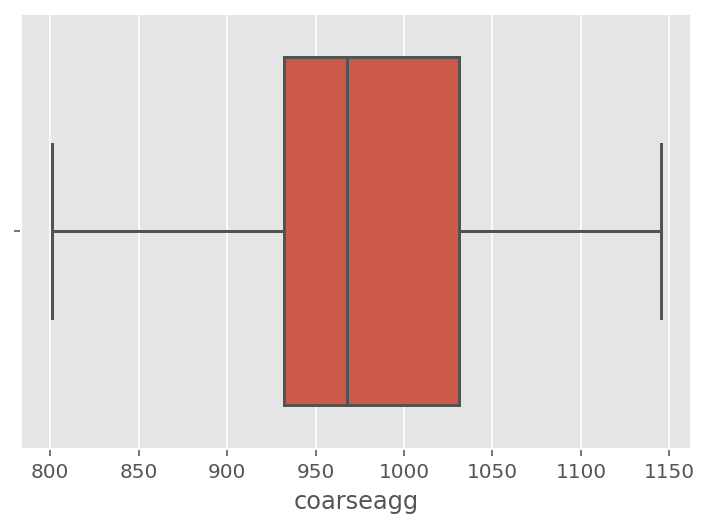

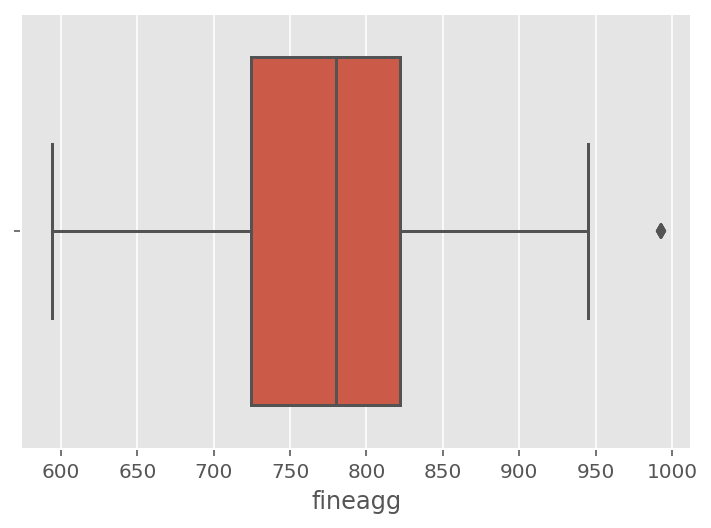

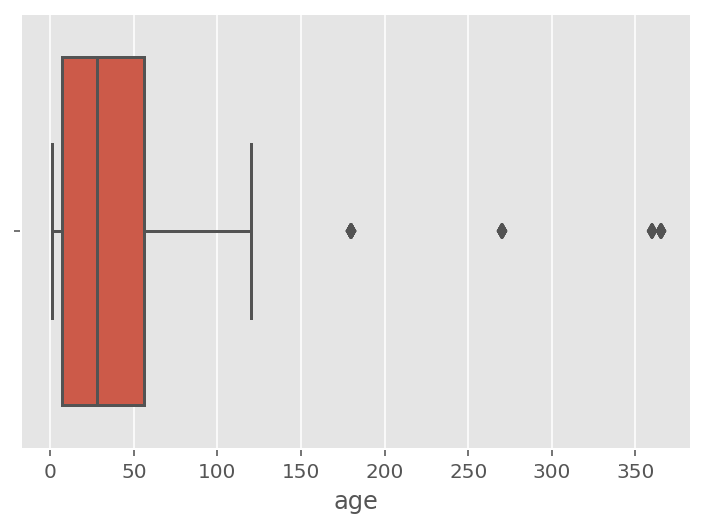

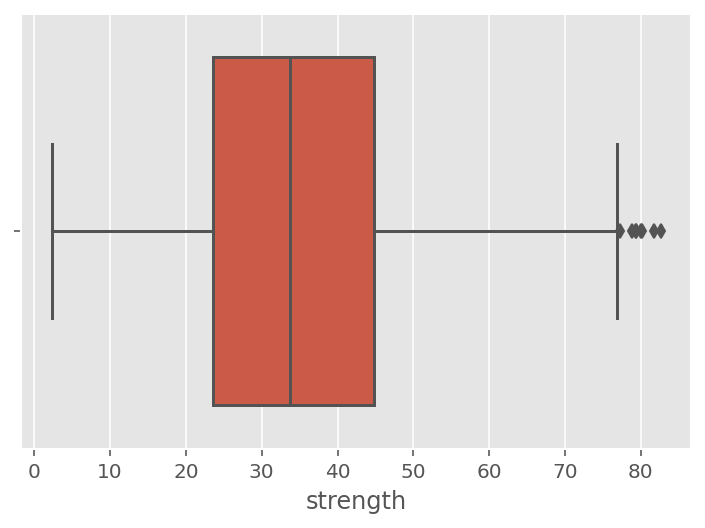

In [14]:
conc_attributes = concrete_df.columns.values
for i in conc_attributes:
    sns.boxplot(x = concrete_df[i])
    plt.show()

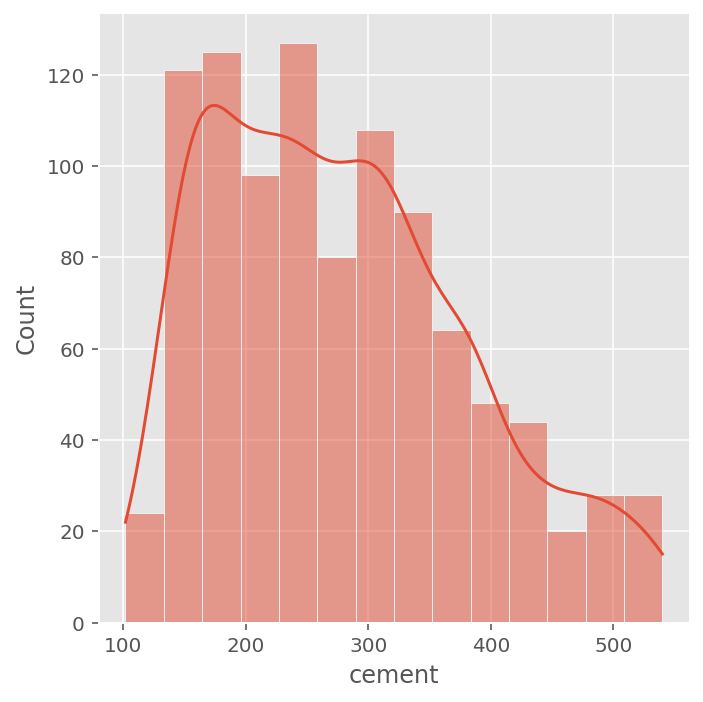

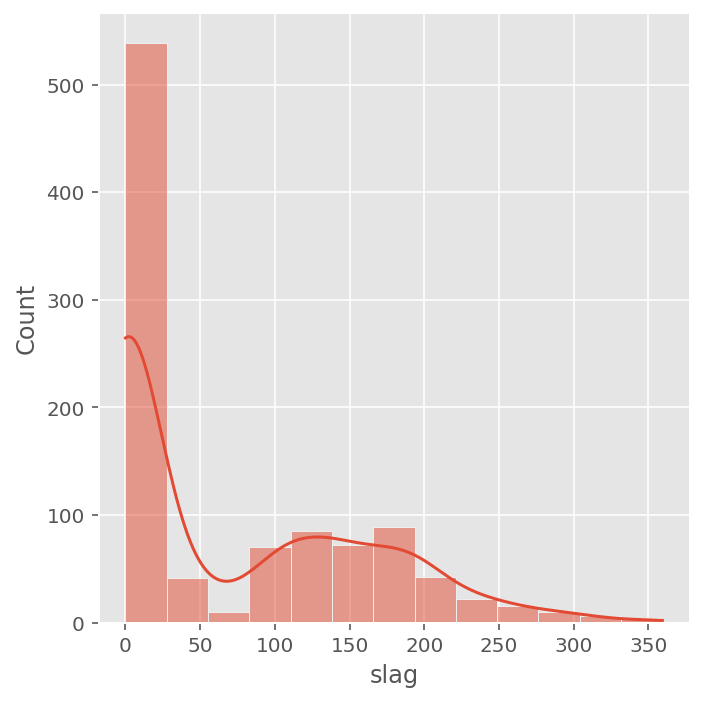

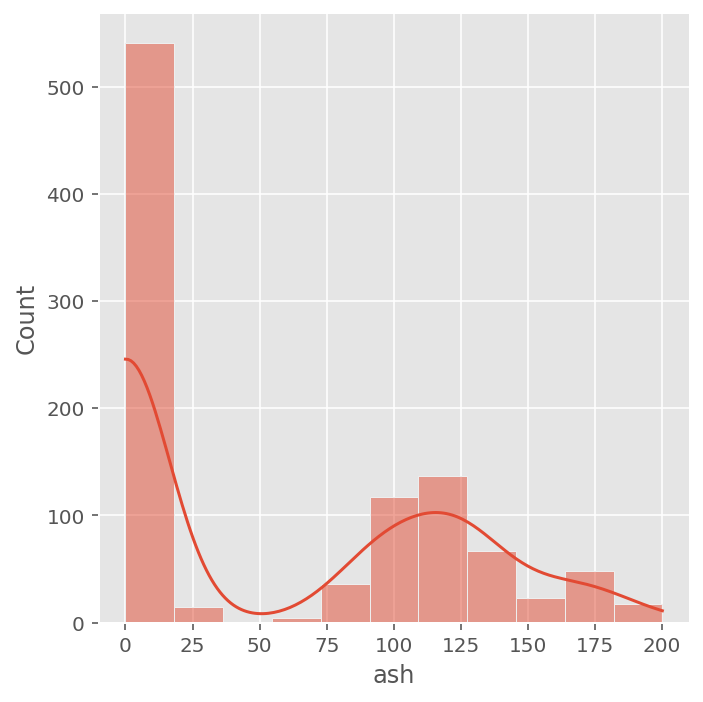

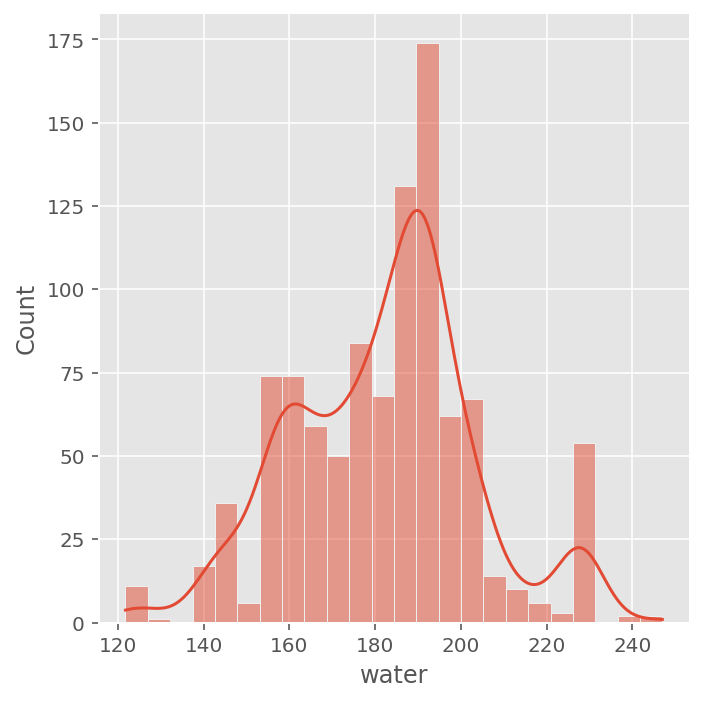

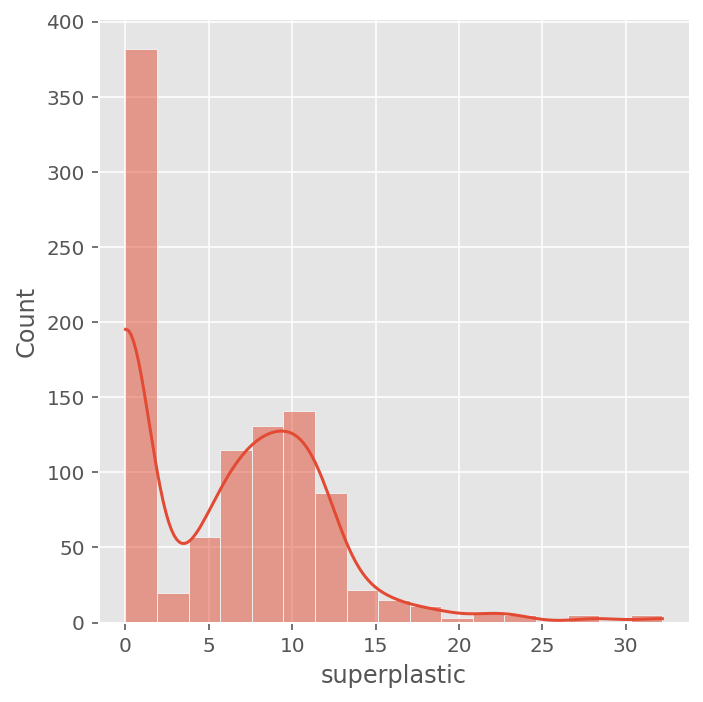

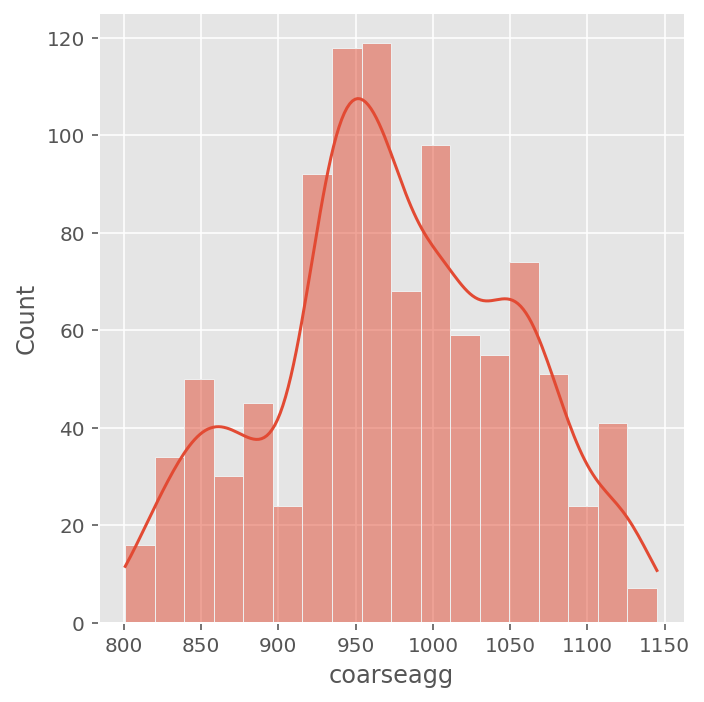

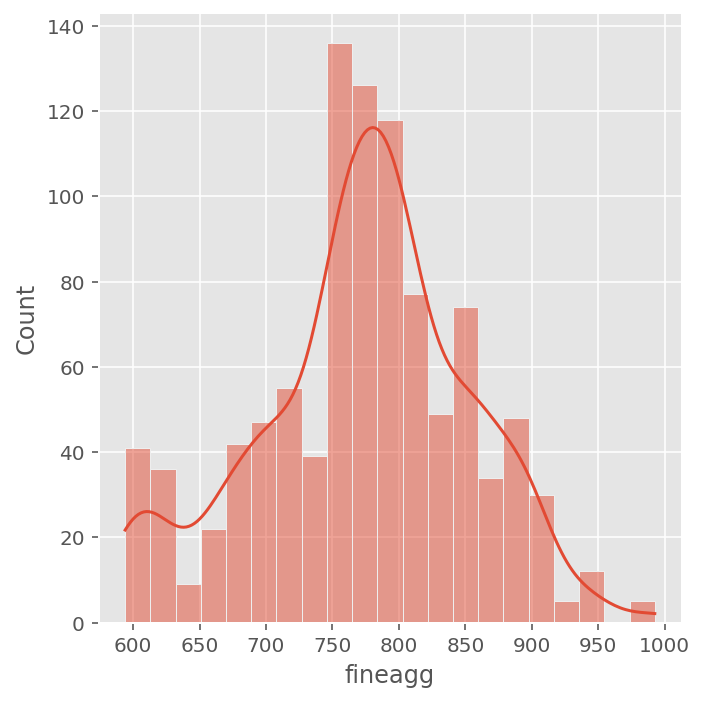

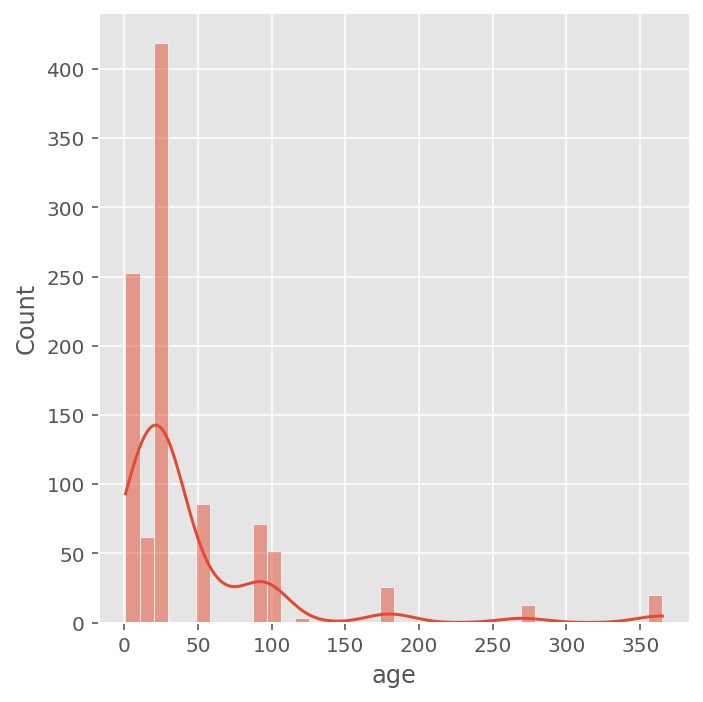

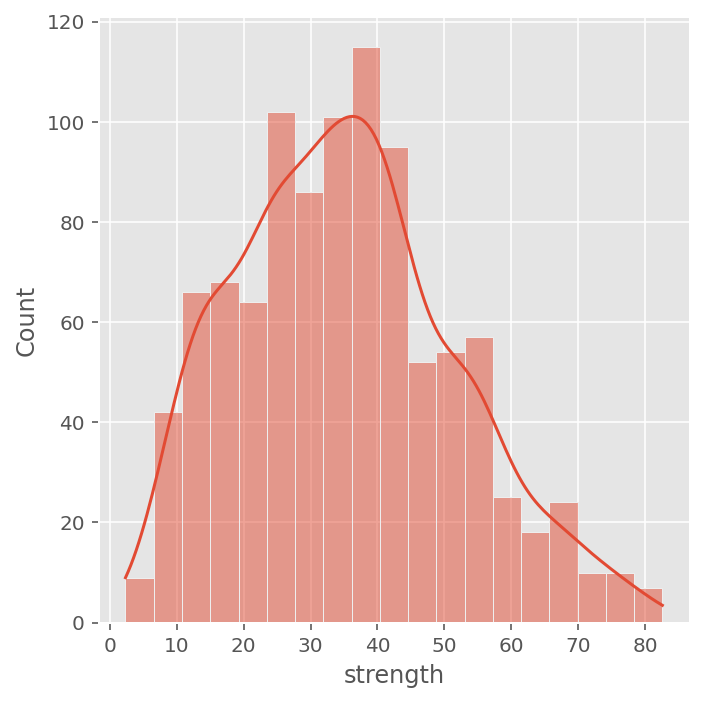

In [15]:
for i in conc_attributes:
    sns.displot(concrete_df[i], kde=True)
    plt.show()

## Bivariate Analysis

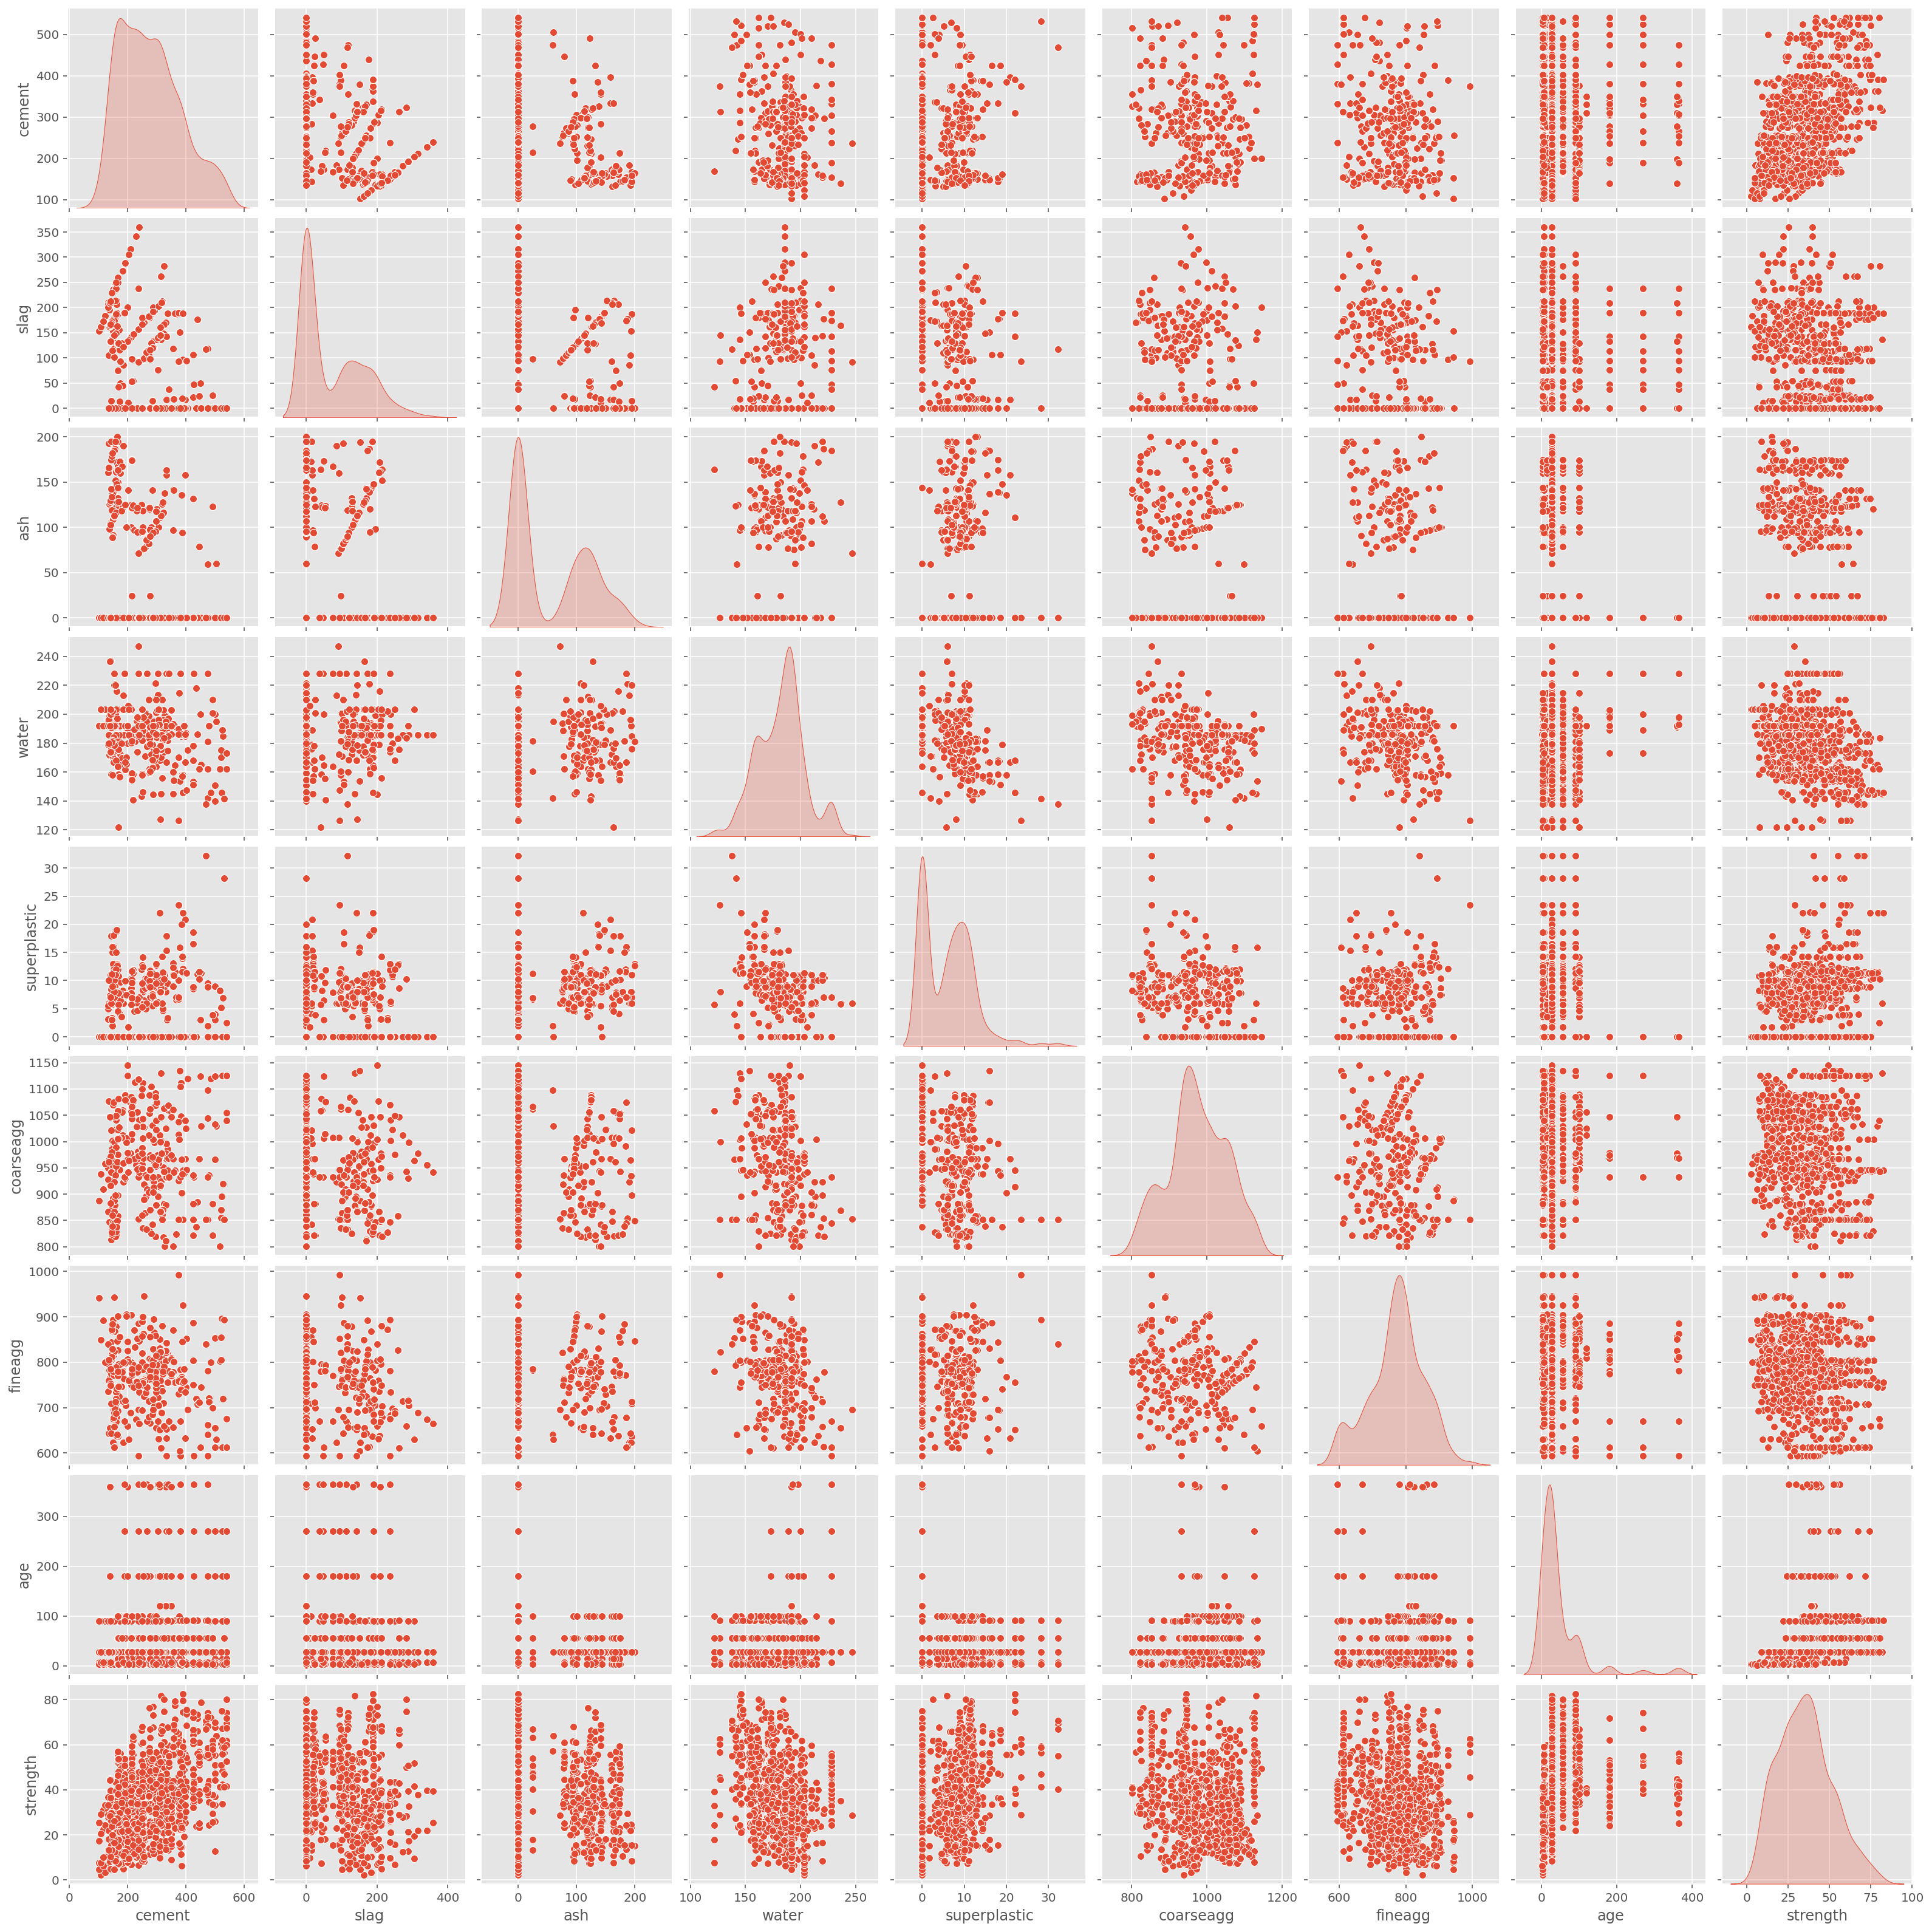

In [16]:
sns.pairplot(concrete_df, diag_kind='kde');
plt.show()

**Insight:**
There appears to be a linear relationship between cement and strength of concrete when looking at the pairplot above. No other obvious relationships seen.

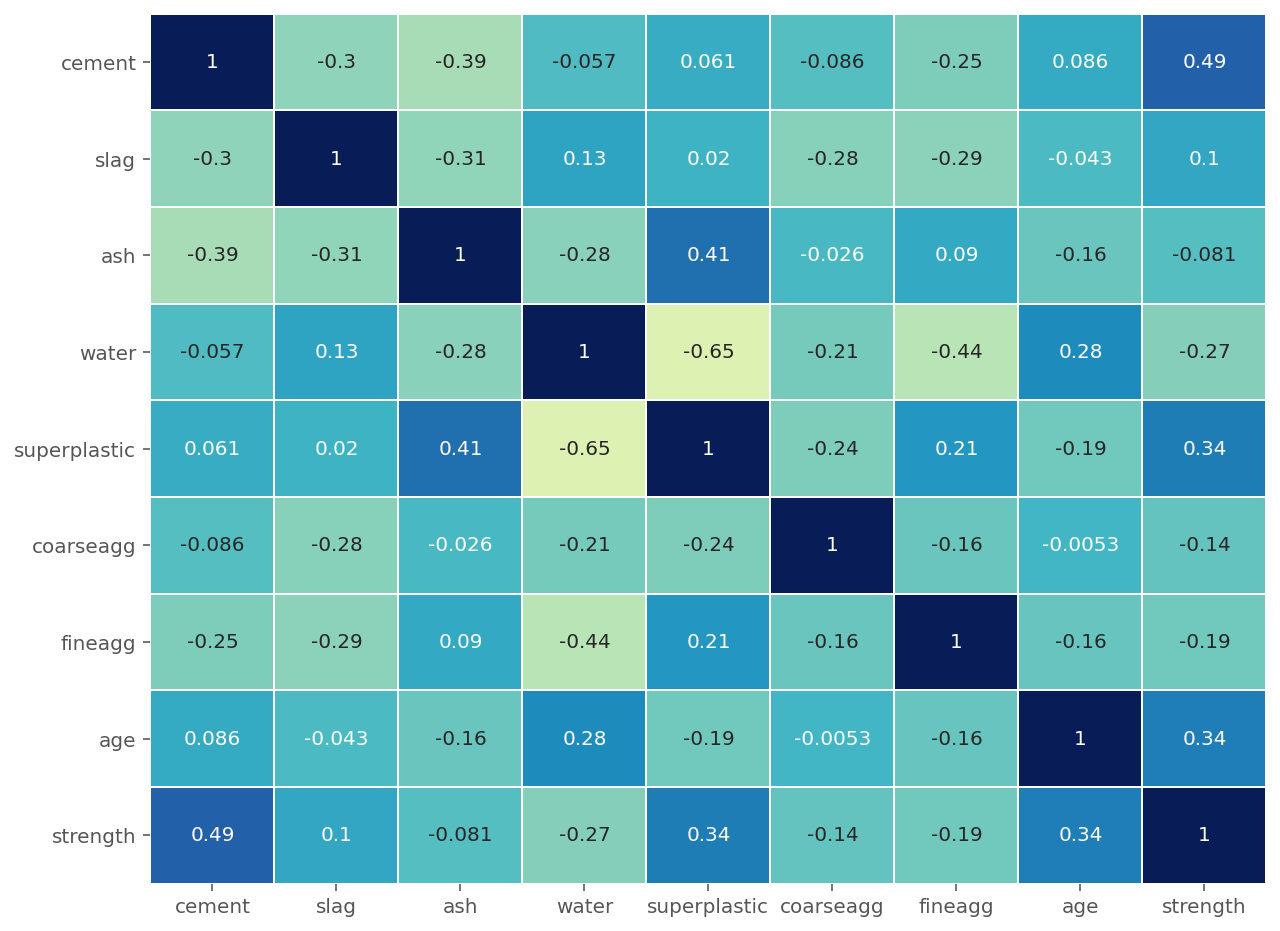

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(concrete_df.corr(),
           annot=True,
           linewidths=.5,
           center=0,
           cbar=False,
           cmap="YlGnBu")
plt.show()

**insight:** There is a mild correlation between cement and strength of concrete, no other correlation present between predictor variables and target variable.

In [18]:
df = concrete_df.copy()
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


### Feature Engineering
I am adding two additional features to the dataset based on existing values:
- A coarse_fine_ratio column which will take into account the ratio of coarse Aggregate to Fine Aggregate used in each record
- A perc_water column which will calculate the percentage of water used in each record

In [19]:
# create and add a coarse_fine_ratio column
df['coarse_fine_ratio'] = df['coarseagg'] / df['fineagg']



In [20]:
# create moisture column
df.loc[0:1, 'cement':'fineagg'].sum(axis=1)
df['perc_water'] = (df['water'] / df[['cement','slag','ash','water','superplastic','coarseagg','fineagg']].sum(axis=1)) * 100
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,coarse_fine_ratio,perc_water
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,1.298330,8.936806
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,1.357448,6.647071
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,1.111124,7.951797
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,1.391045,10.316742
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,1.503373,8.460629


In [21]:
df[['coarse_fine_ratio', 'perc_water', 'strength']].corr()

,coarse_fine_ratio,perc_water,strength
coarse_fine_ratio,1.000000,0.166942,0.075494
perc_water,0.166942,1.000000,-0.292718
strength,0.075494,-0.292718,1.000000


`seemingly no correlation seen between the two additional features and concrete strength`

In [22]:
# Split Train/Test data 70:30 ratio
from sklearn.model_selection import train_test_split

y = df['strength']
X = df.drop('strength', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((703, 10), (302, 10), (703,), (302,))

### Linear Regression Model

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
score_1_train = lr_model.score(X_train, y_train)
score_1_train


0.6091242826047815

In [24]:
score_1_test = lr_model.score(X_test, y_test)
print(f"Linear Regression R^ score: {score_1_test}")

Linear Regression R^ score: 0.6165626567186375


### Random Forest Regressor Model

In [25]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
score_2_train = rf_model.score(X_train, y_train)
rf_pred = rf_model.predict(X_test)
score_2_train

0.9822990235847514

In [26]:
score_2_test = rf_model.score(X_test, y_test)
print(f"Random Forest Regressor R2 score: {score_2_test}")

Random Forest Regressor R2 score: 0.8920200947868716


### Gradient Boosting Model

In [27]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train, y_train)
gbr_pred = gbr_model.predict(X_test)
score_3_train = gbr_model.score(X_train, y_train)
score_3_train

0.9489666362076536

In [28]:
score_3_test = gbr_model.score(X_test, y_test)
print(f"Gradient Boosting Regressor R2 score: {score_3_test}")

Gradient Boosting Regressor R2 score: 0.8932857350109409


### K fold Cross Validation scores

In [29]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 10


kfold = KFold(n_splits=num_folds)
score_1_cv = cross_val_score(lr_model, X, y, cv=kfold)
score_1_cv.mean()

0.5853962344048588

In [30]:
score_2_cv = cross_val_score(rf_model, X, y, cv=kfold)
score_2_cv.mean()

0.907850121628961

In [31]:
score_3_cv = cross_val_score(gbr_model, X, y, cv=kfold)
score_3_cv.mean()

0.8987512559730254

In [32]:
compare_modelsDF = pd.DataFrame({ 'Method': ['Linear Regression', 'Random Forest Regressor', 'Gradient Boosting Regressor'],
                              'K fold CV score': [score_1_cv.mean(), score_2_cv.mean(), score_3_cv.mean()],
                              'K fold CV std': [score_1_cv.std(), score_2_cv.std(), score_2_cv.std()]})
compare_modelsDF

,Method,K fold CV score,K fold CV std
0,Linear Regression,0.585396,0.081731
1,Random Forest Regressor,0.907850,0.034071
2,Gradient Boosting Regressor,0.898751,0.034071


### parameter tuning using RandomSearch

In [33]:
from sklearn.model_selection import RandomizedSearchCV
rf_parameters = {'bootstrap': [True],
                'max_depth': [10, 20, 30, 40, 50, 80],
                'max_features': ['auto', 'sqrt'],
                'min_samples_leaf': [1,2,4,8],
                'n_estimators': [50, 100]}

randomCV = RandomizedSearchCV(RandomForestRegressor(), rf_parameters)
randomCV.fit(X, y)
print(randomCV.best_params_)


{'n_estimators': 100, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 30, 'bootstrap': True}


In [34]:
gbr_parameters = {'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
                  'max_depth': [10, 20, 30, 40, 50],
                  'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
                  'max_features': ['auto', 'sqrt'],
                  'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01]}
randomCV_gbr = RandomizedSearchCV(GradientBoostingRegressor(), gbr_parameters)


In [35]:
randomCV_gbr.fit(X, y)
print(randomCV_gbr.best_params_)

{'n_estimators': 100, 'min_samples_leaf': 0.1, 'max_features': 'auto', 'max_depth': 50, 'learning_rate': 0.05}


In [36]:
rf_model2 = RandomForestRegressor(n_estimators= 50, 
                                 min_samples_leaf= 1,
                                 max_features= 'sqrt',
                                 max_depth= 40,
                                 bootstrap= True)
score_4_cv = cross_val_score(rf_model2, X, y, cv=kfold)
score_4_cv.mean()

0.9076541618983045

In [37]:
gbr_model2 = GradientBoostingRegressor(n_estimators= 32,
                                      min_samples_leaf = 0.1,
                                      max_features = 'auto',
                                      max_depth = 20,
                                      learning_rate = 0.5)
score_5_cv = cross_val_score(gbr_model2, X, y, cv=kfold)
score_5_cv.mean()

0.8950310478889743

In [38]:
tempResultDf = pd.DataFrame({'Method': ['Random Forest Tuned', 'Gradient Boosting Tuned'],
                            'K fold CV score': [score_4_cv.mean(), score_5_cv.mean()],
                            'K fold CV std': [score_4_cv.std(), score_5_cv.std()]})
compare_modelsDF = pd.concat([compare_modelsDF, tempResultDf])
compare_modelsDF.set_index('Method')

,K fold CV score,K fold CV std
Method,,
Linear Regression,0.585396,0.081731
Random Forest Regressor,0.907850,0.034071
Gradient Boosting Regressor,0.898751,0.034071
Random Forest Tuned,0.907654,0.024983
Gradient Boosting Tuned,0.895031,0.023569
